# Prosper Loan Data Exploration
## by Roger McClain

## Preliminary Wrangling

> For this Data Exploration I will be taking a look at the Prosper Load Data set, which contains data about 113,937 loans with 81 variables for each of them. This includes things like loan amount, interest rate, current loan status, borrower income, etc. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

c:\users\yarr\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')

In [4]:
# take a look at the structure of the data set
loan_df.shape

(113937, 81)

In [7]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
df = loan_df.copy()

##### I can already tell that this dataset is to large to comfortably deal with in one dataframe, so I may need to break it into a smaller dataframes with some variables of interest

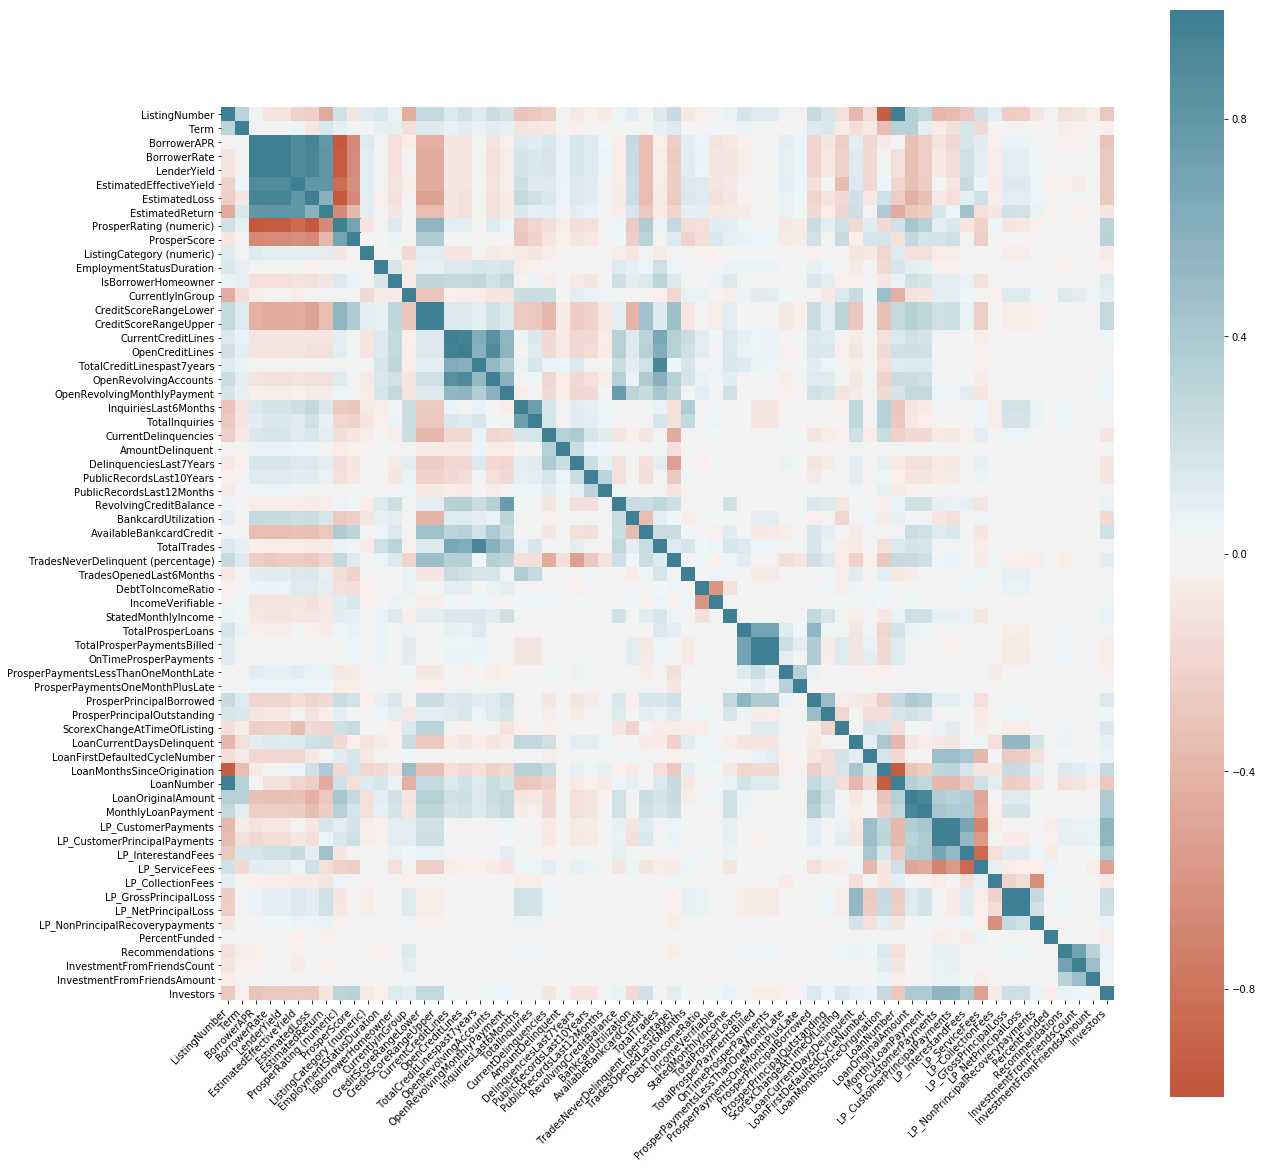

In [20]:
# lets make a heatmap to see if we notice any obvious relationships
corr = df.corr()
plt.figure(figsize=(20,20))
ax = sb.heatmap(corr, vmin = -1, vmax = 1, center = 0,cmap = sb.diverging_palette(20, 220, n = 200),
    square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

##### Kind of interesting, but obviously difficult to see what is happening in a heatmap of this size

In [49]:
bar = abs(corr)
filtered_corr = bar[bar > 0.5]
filtered_corr = filtered_corr[filtered_corr < 1.0].dropna(how = 'all')
filtered_corr

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BorrowerAPR,NaN,NaN,NaN,0.989824,0.989329,0.895635,0.949538,0.794275,0.962151,0.668287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BorrowerRate,NaN,NaN,0.989824,NaN,0.999211,0.895282,0.945297,0.817670,0.953105,0.649736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LenderYield,NaN,NaN,0.989329,0.999211,NaN,0.895343,0.945308,0.817654,0.953119,0.649783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedEffectiveYield,NaN,NaN,0.895635,0.895282,0.895343,NaN,0.798135,0.801568,0.848394,0.632003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedLoss,NaN,NaN,0.949538,0.945297,0.945308,0.798135,NaN,0.591056,0.964182,0.673727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedReturn,NaN,NaN,0.794275,0.817670,0.817654,0.801568,0.591056,NaN,0.659980,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProsperRating (numeric),NaN,NaN,0.962151,0.953105,0.953119,0.848394,0.964182,0.659980,NaN,0.705221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProsperScore,NaN,NaN,0.668287,0.649736,0.649783,0.632003,0.673727,NaN,0.705221,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScoreRangeLower,NaN,NaN,NaN,NaN,NaN,NaN,0.511263,NaN,0.548874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


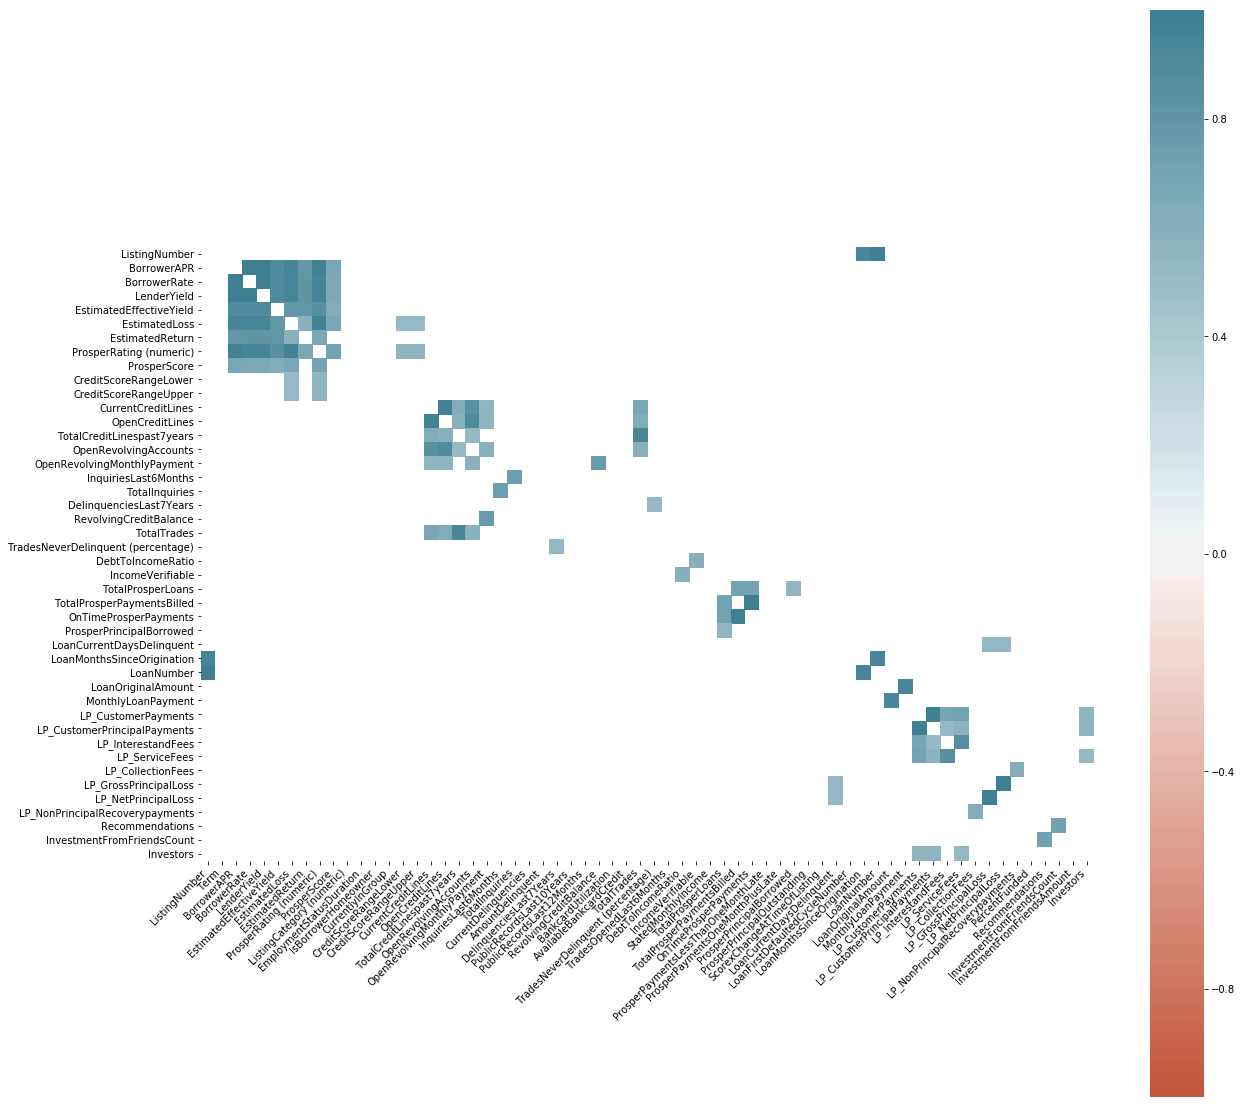

In [50]:
plt.figure(figsize=(20,20))
ax = sb.heatmap(filtered_corr, vmin = -1, vmax = 1, center = 0,cmap = sb.diverging_palette(20, 220, n = 200),
    square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

### What is the structure of your dataset?

> This dataset is structered in 81 columns by 113937 rows. The columns are various variables related to the loan process.

### What is/are the main feature(s) of interest in your dataset?

> Some main features that I am interested in in this dataset are which factors affect a loan's outcome status, what factors affect interest rate, and what types of differences occur when the loan is a large amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the features that will support this investigation the most are the APR, credit score, total loans, and stated income. These variables should have a relationship with the success of the loan.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!